# Import des librairies nécessaires

In [ ]:
# Librairie générales

import os
import sys
import importlib

# Librairies personnelles
path = os.getcwd()
path_src = os.path.abspath(os.path.join(path, os.pardir,"src"))
sys.path.append(path_src)

from data import data
importlib.reload(data)
from models import ModelManager
importlib.reload(ModelManager)


## Test version POO 2

In [36]:
importlib.reload(data)

dir_global  = "donnees/"
case_study  = "test/"


file_data   = "dataframe.csv"
file_opti   = "config.json"

#dir_data = "hutchinson"
data_file_location = dir_global+case_study+file_data
config_location = dir_global+case_study+file_opti


data_obj = data.Data(data_file_location = data_file_location, 
                     config_location = config_location)


In [30]:
data_obj.options['f_configs']

{'larg': {'vmin': 0.0, 'vmax': 1800.0, 'type': 'num'},
 'esort_1': {'vmin': 1.0, 'vmax': 35.0, 'type': 'num'},
 'esort_2': {'vmin': 1.0, 'vmax': 35.0, 'type': 'num'},
 'metal': {'modalites': '', 'type': 'disc'}}

In [37]:
data_obj.ReadModelingOptions()
data_obj.ReadCSVData()

In [34]:
data_obj.data.dtypes

pf2        float64
metal       object
larg       float64
esort_1    float64
esort_2    float64
dtype: object

In [38]:
data_obj.data

,pf2,metal,larg,esort_1,esort_2
Date,,,,,
2019-01-01 09:46:54,6600639.50,41,1295.651245,18.122026,10.676539
2019-01-01 09:48:04,5640636.00,41,1295.513062,20.505846,13.160074
2019-01-01 09:50:36,4827875.00,41,1304.155762,20.814590,13.561180
2019-01-01 09:51:54,4397215.00,47,1285.528442,23.288582,17.020079
2019-01-01 09:53:36,3605138.75,48,1266.692627,33.050545,24.049286
...,...,...,...,...,...
2019-01-31 09:32:42,4735221.50,10,1126.765503,20.757746,13.499364
2019-01-31 09:35:13,4378423.00,10,1127.223511,20.757746,13.499364
2019-01-31 09:36:38,4464692.00,10,1126.620361,20.757746,13.499364


## Lancement global

## Lancement par étapes

apprentissage du modèle
Création des résultats au format json
_12F1___Taux_réduction_ébauche
LARG_S_5
LGD_5


c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


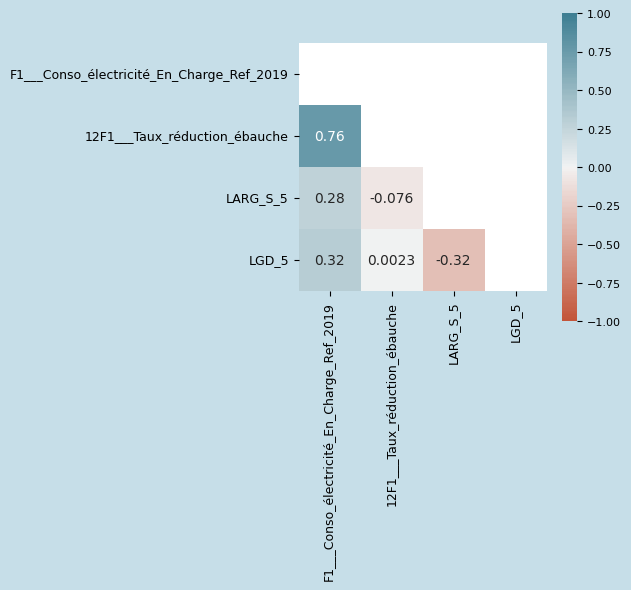

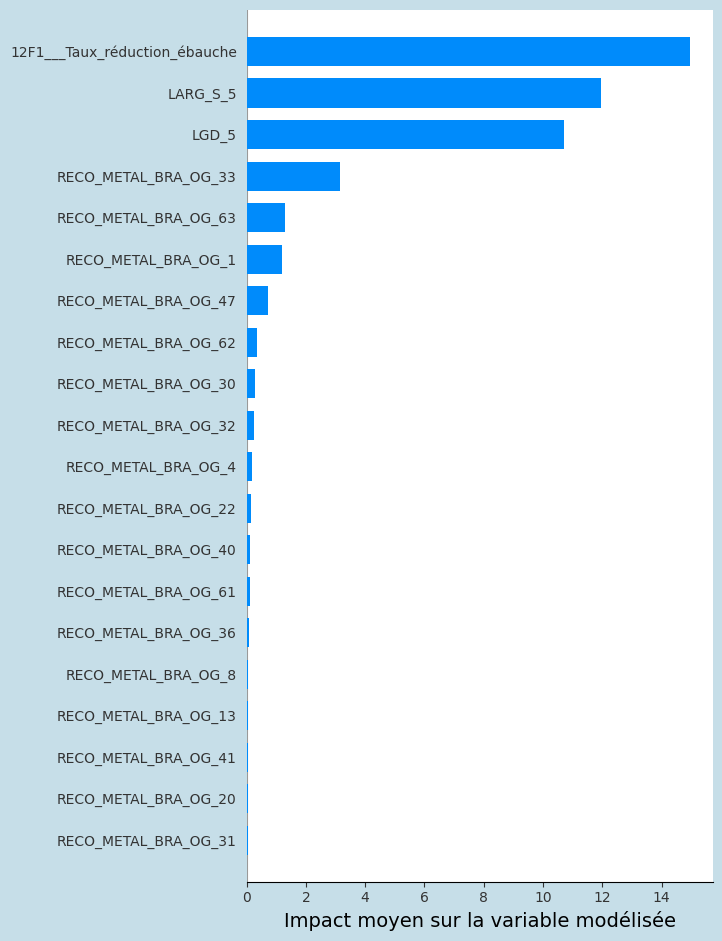

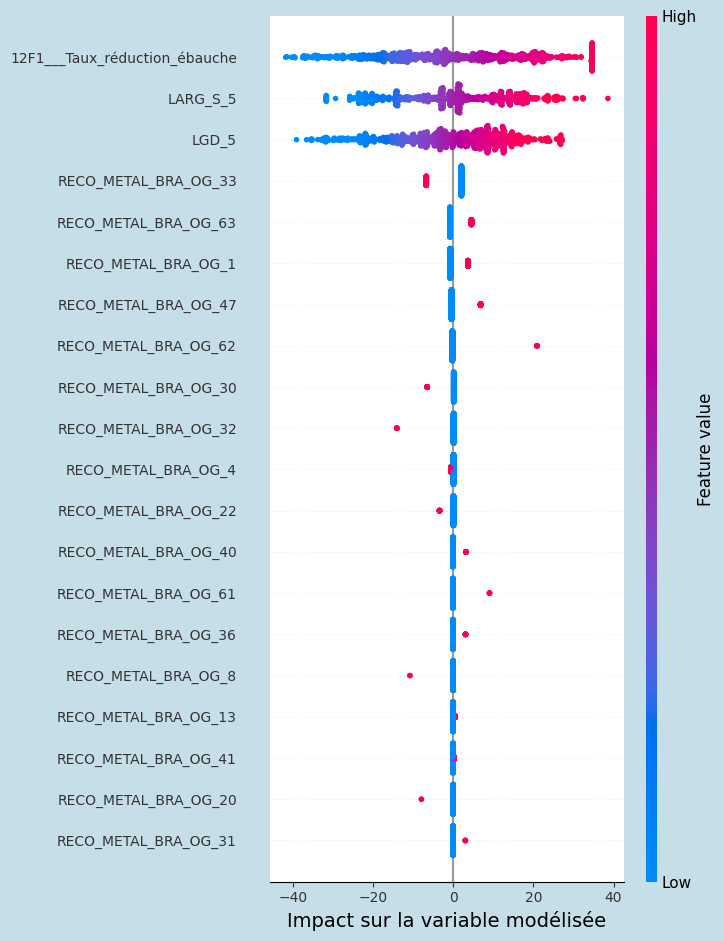

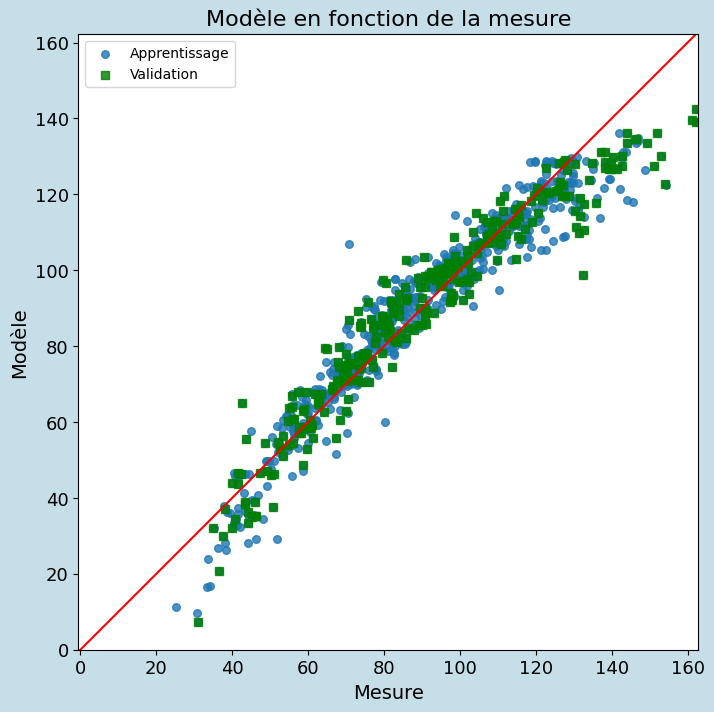

In [3]:


data_obj.ReadModelingOptions()
data_obj.ReadCSVData()
data_obj.CleanReport()

model_manager_obj = ModelManager.ModelRunner(data_obj=data_obj, pdfreport='Yes')

model_manager_obj.BuildAndTrain()

       

In [14]:
os.path.isfile('../donnees/VPK_IPE_Elec/dataframe.csv')

True

In [10]:
df = data_obj.GetData()

In [ ]:
col_names = df.columns.to_list()

new_names = ['_'+c for c in col_names]
df.columns = new_names

In [13]:
df.columns = new_names

In [18]:
col_names

['139FI1121_QmVap_av', '139FI1128_av', '139FI1241_av', '139FI1232_av']

In [14]:
import statsmodels.formula.api as smf


if df is not None:

    try:
        df.dropna(inplace=True)
        formula = df.columns[0] + '~'
        formula = formula + '+'.join(list(df.columns[1:]))
        model_smf = smf.ols(formula=formula, data=df).fit()

    except Exception as error:
        model_smf = None

In [17]:
model_smf.pvalues.tolist()

[0.0, 0.0, 0.0, 0.0]

In [24]:
nom_facteurs = model_smf.pvalues.index.tolist()
new_nom_facteurs = [nom_facteurs[0]] + [f[1:] for f in nom_facteurs[1:]]


In [26]:
nom_facteurs

['Intercept', '_139FI1128_av', '_139FI1241_av', '_139FI1232_av']

In [27]:
new_nom_facteurs = [nom_facteurs[0]] + [f[1:] for f in nom_facteurs[1:]]

In [29]:
model_smf.params.to_list()

[1.8985285408031416, 3.923195837675655, 0.8544810541492184, 1.083296733045373]

In [15]:

            self.resu_model['Statistiques']['pvalues'] = self.model_smf.pvalues.tolist()
            self.resu_model['Statistiques']['facteurs'] = self.model_smf.pvalues.index.tolist()
            self.resu_model['Statistiques']['coefs']    = self.model_smf.params.to_list()            
            self.resu_model['Statistiques']['pertinents'] = [True if pv<0.05 else False for pv in self.model_smf.pvalues.tolist() ]

In [9]:
model_smf = smf.ols(formula=formula, data=df).fit()

SyntaxError: invalid syntax (<unknown>, line 1)

In [8]:
formula

'139FI1121_QmVap_av~139FI1128_av+139FI1241_av+139FI1232_av'

In [4]:
from interpretation import shapeley
importlib.reload(shapeley)
interpreteur_obj = shapeley.Interpreteur(model_obj = model_manager_obj.model_obj,
                                data_obj = data_obj,
                                rapport_obj = model_manager_obj.model_obj.rapport_obj)


interpreteur_obj.Run()

In [5]:
ShortMglProd  = "VPK.Alizay.MAP.Alizay_MAP_Prod_NETPAPIER_t_1d"

In [7]:
ShortMglProd.split(".")[-1]

'Alizay_MAP_Prod_NETPAPIER_t_1d'

In [9]:
from interpretation import shapeley
importlib.reload(shapeley)


interpreteur_obj = shapeley.Interpreteur(model_obj = model_manager_obj.model_obj,
                                data_obj = data_obj,
                                rapport_obj = model_manager_obj.model_obj.rapport_obj)
interpreteur_obj.ComputeShapeleyValues()

interpreteur_obj.CreateDicoFormuleRegLinFrequence()
#interpreteur_obj.CreateDicoFormuleOthersFrequences()
interpreteur_obj.CreateDicoFormuleConsoSpecOthersFrequences()

In [10]:
interpreteur_obj.ExportToFormulaFile()